
# Probing where and how PTM flanking sequences are altered

In order to understand how PTMs may be altered due to splicing events, it is useful to identify the flanking sequences of the PTMs and how they may be altered due to nearby splice events (as identified by flanking sequence module). Once we have, this information we can analyze and visualize where the alterations in the flanking sequences occur. First, we need to compare the flanking sequences of PTMs based on whether an exonic region is included or excluded using the `compare_flanking_sequences` function in PTM-POSE.


In [1]:
from ptm_pose import analyze, helpers


#load example altered flanking sequence data
altered_flanks = helpers.load_example_data(spliced_ptms = False)

altered_flanks = analyze.compare_flanking_sequences(altered_flanks)
print('Comparison of flanking sequences:')
altered_flanks[['UniProtKB Accession', 'Residue', 'PTM Position in Isoform', 'Modification Class', 'Inclusion Flanking Sequence', 'Exclusion Flanking Sequence', 'Sequence Identity', 'Altered Positions', 'Residue Change', 'Altered Flank Side']].head()

/home/srcrowl/miniconda3/envs/pose_doc/lib/python3.12/site-packages/ptm_pose/pose_config.py:20: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})


Comparison of flanking sequences:


,UniProtKB Accession,Residue,PTM Position in Isoform,Modification Class,Inclusion Flanking Sequence,Exclusion Flanking Sequence,Sequence Identity,Altered Positions,Residue Change,Altered Flank Side
0,Q68EM7,S,497,Phosphorylation,LVKKEsFGVKL,LVKKEsPPKPK,0.636364,"[1.0, 2.0, 3.0, 4.0, 5.0]","[F->P, G->P, V->K, K->P, L->K]",C-term only
1,Q68EM7,S,497,Phosphorylation,LVKKEsFGVKL,LVKKEsPPKPK,0.636364,"[1.0, 2.0, 3.0, 4.0, 5.0]","[F->P, G->P, V->K, K->P, L->K]",C-term only
2,P01116,T,148,Phosphorylation,ETSAKtRQRVE,ETSAKtRQGVD,0.818182,"[3.0, 5.0]","[R->G, E->D]",C-term only
3,P01116,K,147,Acetylation,IETSAkTRQRV,IETSAkTRQGV,0.909091,[4.0],[R->G],C-term only
4,P01116,K,147,Ubiquitination,IETSAkTRQRV,IETSAkTRQGV,0.909091,[4.0],[R->G],C-term only


Note, we only calculate these metrics for cases where altered flanking sequences do not cause a stop codon to be introduced, as this is harder to interpret (such as for the first PTM in the list). The above table will indicate the positions in the flanking sequence that are altered, how similar the altered flanking sequence is to the original flanking sequence, and the specific residue change that takes place. We can also plot some of this information to get a better sense of the distribution of altered flanking sequences:



/home/srcrowl/miniconda3/envs/pose_doc/lib/python3.12/site-packages/ptm_pose/plots.py:658: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['N-term\nonly', 'C-term\nonly'])


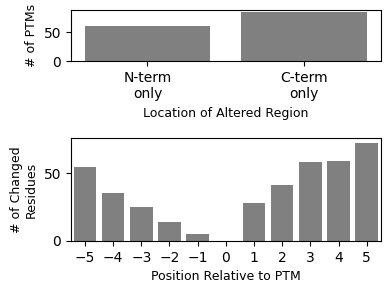

In [2]:
from ptm_pose import plots as pose_plots

pose_plots.location_of_altered_flanking_residues(altered_flanks)

We can even create the same plot for specific modification types or residues, as well as label the specific residue changes that occur:



/home/srcrowl/miniconda3/envs/pose_doc/lib/python3.12/site-packages/ptm_pose/plots.py:658: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['N-term\nonly', 'C-term\nonly'])


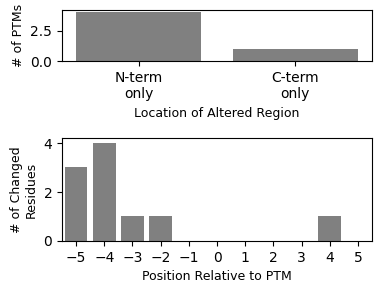

In [3]:
pose_plots.location_of_altered_flanking_residues(altered_flanks, modification_class='Acetylation')

If we want to dig deeper, we can look at the specific changes that occurring, although this is only recommended with a selected subset of PTMs, such as those that may have a functional impact:



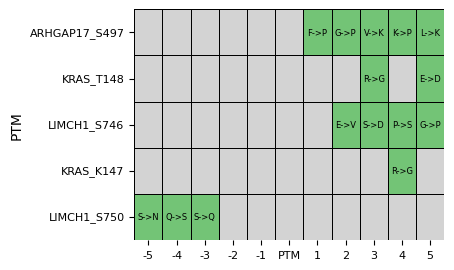

In [4]:
pose_plots.alterations_matrix(altered_flanks.head(10))